In [1]:
!pip install catboost
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

     |████████████████████████████████| 66.3MB 66kB/s 


# Data  Loading


In [2]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-burnout-rate/predict-the-employee-burn-out-rate-7-6340b4e3/d4c937c412c011eb.zip
!unzip /content/d4c937c412c011eb.zip

--2020-11-20 07:46:28--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-burnout-rate/predict-the-employee-burn-out-rate-7-6340b4e3/d4c937c412c011eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.236
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401409 (392K) [application/zip]
Saving to: ‘d4c937c412c011eb.zip’

d4c937c412c011eb.zi 100%[===================>] 392.00K  2.06MB/s    in 0.2s    

2020-11-20 07:46:28 (2.06 MB/s) - ‘d4c937c412c011eb.zip’ saved [401409/401409]

Archive:  /content/d4c937c412c011eb.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        
  inflating: dataset/sample_submission.csv  


# Data Statistics and Visualization

In [3]:
dtrain=pd.read_csv("/content/dataset/train.csv")
dtest=pd.read_csv('/content/dataset/test.csv')

In [ ]:
dtrain.shape

(22750, 9)

In [ ]:
dtest.shape

(12250, 8)

In [ ]:
dtrain['Employee ID'].nunique()

22750

In [ ]:
dtrain.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
dtest.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
# null values percentage
(dtrain.isnull().sum()/dtrain.shape[0])*100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

In [ ]:
dtest.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
dtrain.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
dtest.describe()

,Designation,Resource Allocation,Mental Fatigue Score
count,12250.000000,12250.000000,12250.000000
mean,2.175265,4.458857,5.720571
std,1.132885,2.045602,1.914063
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,4.500000
50%,2.000000,4.000000,5.900000
75%,3.000000,6.000000,7.100000
max,5.000000,10.000000,10.000000


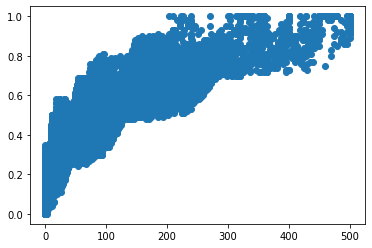

In [ ]:
plt.scatter(,dtrain['Burn Rate'])

In [ ]:
sum=[]
for x in dtrain['Employee ID'].iteritems():
  s=0
  for y in range(4,len(x[1])):
    s+=int(x[1][y])
  sum.append(s)

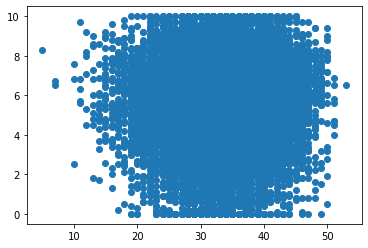

In [ ]:
plt.scatter(sum,dtrain['Mental Fatigue Score'])

In [ ]:
dtrain[(dtrain['Burn Rate'].isnull()==True) & (dtrain['Mental Fatigue Score']==0)]

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
5544,fffe3800340035003600,2008-11-14,Male,Product,Yes,0.0,NaN,0.0,NaN
5834,fffe31003600320037003800,2008-06-14,Male,Product,Yes,0.0,1.0,0.0,NaN
9311,fffe31003900320034003500,2008-08-19,Male,Product,Yes,0.0,1.0,0.0,NaN
9707,fffe3200360035003000,2008-02-10,Female,Service,Yes,1.0,1.0,0.0,NaN
10051,fffe31003500380030003600,2008-08-27,Female,Service,No,1.0,1.0,0.0,NaN
11177,fffe31003900360039003900,2008-11-13,Female,Product,Yes,1.0,1.0,0.0,NaN
20667,fffe31003900350032003300,2008-04-25,Female,Service,Yes,0.0,1.0,0.0,NaN


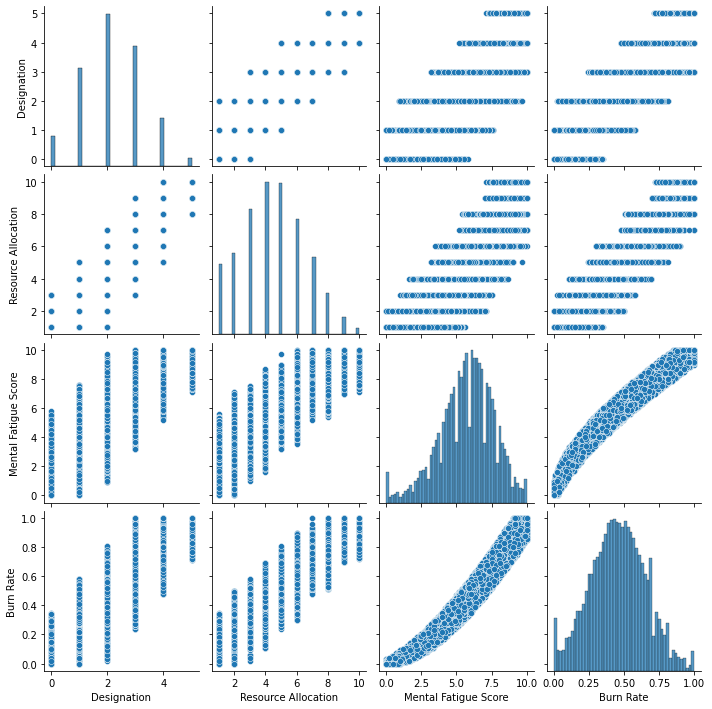

In [ ]:
sns.pairplot(dtrain)

In [ ]:
dtrain['Employee ID'].str.slice(0,6).value_counts()

fffe32    7308
fffe31    7245
fffe33    3915
fffe34     729
fffe38     719
fffe39     715
fffe37     711
fffe35     706
fffe36     702
Name: Employee ID, dtype: int64

In [ ]:
s=dtrain['Employee ID'].str.slice(0,8)
s.value_counts()
#dtrain.groupby('id_feature')['Burn Rate'].mean().head(20)

fffe3200    7308
fffe3100    7245
fffe3300    3915
fffe3400     729
fffe3800     719
fffe3900     715
fffe3700     711
fffe3500     706
fffe3600     702
Name: id_feature, dtype: int64

There is comparatively more people with emp id fffe3200,fffe3100 and fffe3300.

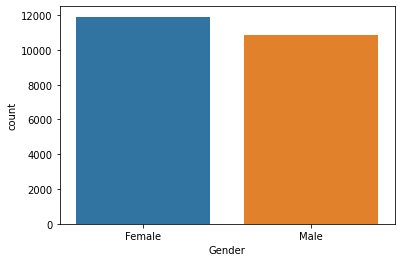

In [ ]:
sns.countplot(x='Gender',data=dtrain)

Females are slightly more than males.

In [ ]:
dtrain.groupby('Gender')['Burn Rate'].mean()

Gender
Female    0.422788
Male      0.484271
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby('Gender')['Mental Fatigue Score'].mean()

Gender
Female    5.460696
Male      6.020846
Name: Mental Fatigue Score, dtype: float64

In [ ]:
dtrain.groupby('Gender')['Resource Allocation'].mean()

Gender
Female    4.201929
Male      4.789029
Name: Resource Allocation, dtype: float64

In [ ]:
dtrain.groupby('Gender')['Designation'].value_counts()

Gender  Designation
Female  2.0            3991
        3.0            2948
        1.0            2904
        4.0             967
        0.0             921
        5.0             177
Male    2.0            3597
        3.0            3037
        1.0            1977
        4.0            1424
        0.0             586
        5.0             221
Name: Designation, dtype: int64

In [ ]:
dtrain.groupby('Gender')['Company Type'].value_counts()

Gender  Company Type
Female  Service         7817
        Product         4091
Male    Service         7016
        Product         3826
Name: Company Type, dtype: int64

Men are more likely to burn out before women.

Men are more likely to get mentally tired before women.

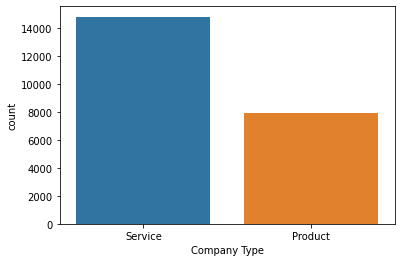

In [ ]:
sns.countplot(x='Company Type',data=dtrain)

In [ ]:
dtrain.groupby('Company Type')['Mental Fatigue Score'].mean()

Company Type
Product    5.721176
Service    5.731913
Name: Mental Fatigue Score, dtype: float64

In [ ]:
dtrain.groupby('Company Type')['Burn Rate'].mean()

Company Type
Product    0.450841
Service    0.452624
Name: Burn Rate, dtype: float64

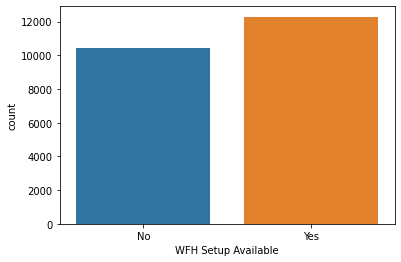

In [ ]:
sns.countplot(x='WFH Setup Available',data=dtrain)

In [ ]:
dtrain.groupby(['Gender','Company Type','Designation'])['Mental Fatigue Score'].mean()

Gender  Company Type  Designation
Female  Product       0.0            2.658385
                      1.0            4.411048
                      2.0            5.512655
                      3.0            6.380876
                      4.0            7.759933
                      5.0            8.962903
        Service       0.0            2.673152
                      1.0            4.381265
                      2.0            5.486014
                      3.0            6.399828
                      4.0            7.688908
                      5.0            8.945745
Male    Product       0.0            2.666497
                      1.0            4.539308
                      2.0            5.843649
                      3.0            6.890356
                      4.0            7.709155
                      5.0            8.795652
        Service       0.0            2.574772
                      1.0            4.501781
                      2.0            5.863442


In [ ]:
dtrain.groupby('WFH Setup Available')['Burn Rate'].mean()

WFH Setup Available
No     0.517824
Yes    0.396010
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby('WFH Setup Available')['Mental Fatigue Score'].mean()

WFH Setup Available
No     6.303178
Yes    5.237346
Name: Mental Fatigue Score, dtype: float64

Majority of employees have work from home setup availiable.

Employees with WFH setup have less burn rate.

Employees with WFH setup have less Mental Fatigue Score.

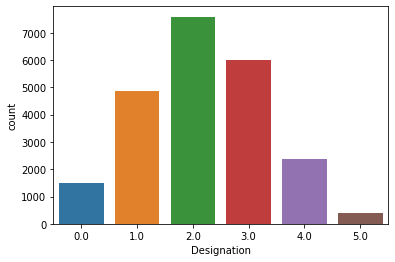

In [ ]:
sns.countplot(x='Designation',data=dtrain)

In [ ]:
dtrain.groupby('Designation')['Burn Rate'].mean()

Designation
0.0    0.151015
1.0    0.308133
2.0    0.435472
3.0    0.545460
4.0    0.686690
5.0    0.856995
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby('Designation')['Mental Fatigue Score'].mean()

Designation
0.0    2.644934
1.0    4.442110
2.0    5.666267
3.0    6.618975
4.0    7.741384
5.0    8.940169
Name: Mental Fatigue Score, dtype: float64

Designation 2 is quite common and 0,4,5 are less

Higher Designation means more burn out rate and mental Fatigue Score.

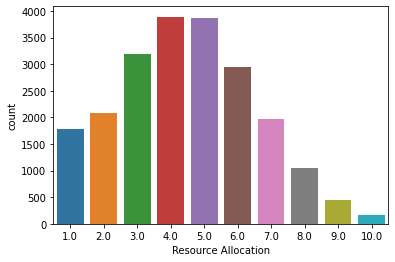

In [ ]:
sns.countplot(x='Resource Allocation',data=dtrain)

In [ ]:
dtrain.groupby('Resource Allocation')['Burn Rate'].mean()

Resource Allocation
1.0     0.137572
2.0     0.253410
3.0     0.340330
4.0     0.418162
5.0     0.493428
6.0     0.576823
7.0     0.654707
8.0     0.736401
9.0     0.830911
10.0    0.904200
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby('Resource Allocation')['Mental Fatigue Score'].mean()

Resource Allocation
1.0     2.475508
2.0     3.910363
3.0     4.817361
4.0     5.551826
5.0     6.199150
6.0     6.907355
7.0     7.503222
8.0     8.123529
9.0     8.773902
10.0    9.219858
Name: Mental Fatigue Score, dtype: float64

More load of work means more stress resulting in high burn rate and Mental Fatigue Score.

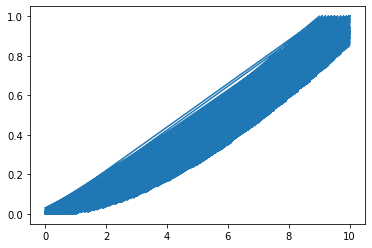

In [ ]:
plt.plot(dtrain['Mental Fatigue Score'],dtrain['Burn Rate'])

Perfectly Linearly correlated variables.i never saw this kind of data ;)

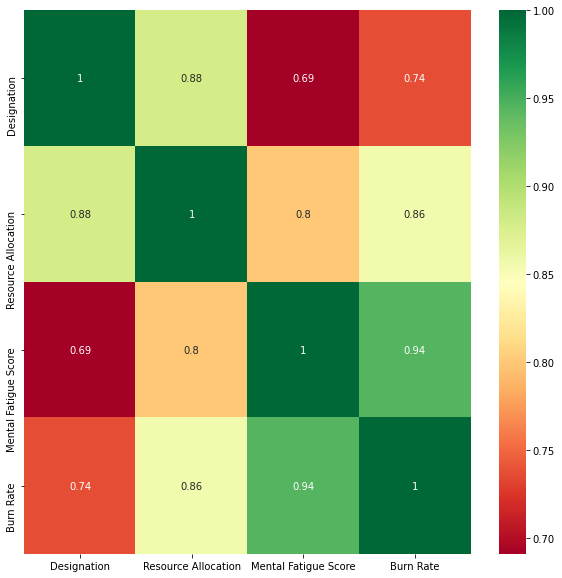

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dtrain.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dtrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


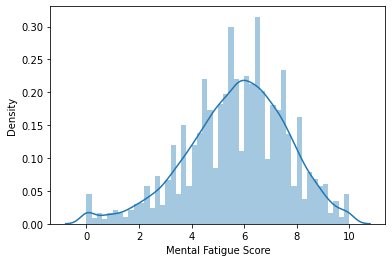

In [ ]:
sns.distplot(dtrain['Mental Fatigue Score'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


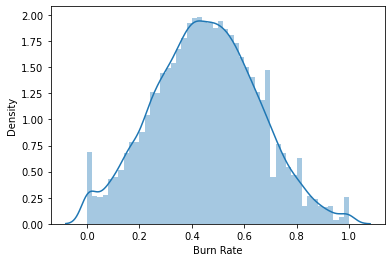

In [ ]:
sns.distplot(dtrain['Burn Rate'])

In [ ]:
df.groupby('month')['Resource Allocation'].mean()

month
1     4.515635
2     4.483457
3     4.417562
4     4.453465
5     4.500000
6     4.572196
7     4.464602
8     4.445625
9     4.509012
10    4.484308
11    4.533022
12    4.465287
Name: Resource Allocation, dtype: float64

**Null Values Observations**

In [ ]:
print("null in Resource allocation : ",dtrain[dtrain['Resource Allocation'].isnull()].shape[0])
print("null in Mental Fatigue Score : ",dtrain[dtrain['Mental Fatigue Score'].isnull()].shape[0])
print("null in Burn rate(target) : ",dtrain[dtrain['Burn Rate'].isnull()].shape[0])

null in Resource allocation :  1381
null in Mental Fatigue Score :  2117
null in Burn rate(target) :  1124


In [ ]:
print("RA and MFS",dtrain[(dtrain['Resource Allocation'].isnull()) & (dtrain['Mental Fatigue Score'].isnull())].shape[0])
print("MFS and BR",dtrain[(dtrain['Mental Fatigue Score'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])
print("RA and BR",dtrain[(dtrain['Resource Allocation'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])
print("RA and MFS and BR",dtrain[(dtrain['Mental Fatigue Score'].isnull()) & (dtrain['Resource Allocation'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])

RA and MFS 202
MFS and BR 172
RA and BR 103
RA and MFS and BR 15


In [ ]:
dtrain[dtrain['Mental Fatigue Score'].isnull()]

In [ ]:
dtrain[dtrain['Burn Rate'].isnull()]

In [ ]:
print(dtrain[(dtrain['Mental Fatigue Score'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])
print(dtrain[(dtrain['Resource Allocation'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])
print(dtrain[(dtrain['Resource Allocation'].isnull()) & (dtrain['Mental Fatigue Score'].isnull())].shape[0])
print(dtrain[(dtrain['Mental Fatigue Score'].isnull()) & (dtrain['Resource Allocation'].isnull()) & (dtrain['Burn Rate'].isnull())].shape[0])

172
103
202
15


In [ ]:
dtrain[(dtrain['Mental Fatigue Score'].isnull()) | (dtrain['Resource Allocation'].isnull()) | (dtrain['Burn Rate'].isnull())].shape[0]

4160

In [ ]:
dtrain.groupby(['Company Type','WFH Setup Available'])['Burn Rate'].mean()

Company Type  WFH Setup Available
Product       No                     0.519244
              Yes                    0.392099
Service       No                     0.517064
              Yes                    0.398074
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby(['Company Type'])['Resource Allocation'].mean()

Company Type
Product    4.464975
Service    4.490115
Name: Resource Allocation, dtype: float64

In [ ]:
dtrain.groupby(['Gender','WFH Setup Available'])['Burn Rate'].mean()

Gender  WFH Setup Available
Female  No                     0.485525
        Yes                    0.376473
Male    No                     0.548225
        Yes                    0.420751
Name: Burn Rate, dtype: float64

In [ ]:
dtrain.groupby(['Gender','Designation'])['Mental Fatigue Score'].mean()

Gender  Designation
Female  0.0            2.667464
        1.0            4.391314
        2.0            5.494863
        3.0            6.393211
        4.0            7.713295
        5.0            8.952564
Male    0.0            2.609125
        1.0            4.514931
        2.0            5.856368
        3.0            6.839716
        4.0            7.760248
        5.0            8.930500
Name: Mental Fatigue Score, dtype: float64

In [ ]:
df.groupby('Designation')['Gender'].value_counts()

Designation  Gender
0.0          0          763
             1          475
1.0          0         2333
             1         1621
2.0          0         3279
             1         2935
3.0          1         2476
             0         2444
4.0          1         1164
             0          783
5.0          1          172
             0          145
Name: Gender, dtype: int64

Men have higher designations(3-5) while women have lower designations(0-2).Thus Women have less mean Burn Rate.

In [ ]:
df.groupby(['Designation','Gender'])['Mental Fatigue Score'].mean()

Designation  Gender
0.0          Female    2.658060
             Male      2.603579
1.0          Female    4.391256
             Male      4.517890
2.0          Female    5.496676
             Male      5.868688
3.0          Female    6.400164
             Male      6.844103
4.0          Female    7.708429
             Male      7.753952
5.0          Female    8.954483
             Male      8.907558
Name: Mental Fatigue Score, dtype: float64

In [ ]:
dtrain['des_res']=dtrain['Designation'].astype('str')+dtrain['Resource Allocation'].astype('str')

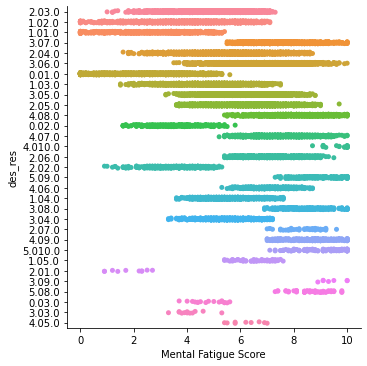

In [ ]:
sns.catplot(y='des_res',x='Mental Fatigue Score',data=dtrain)

In [ ]:
df['gen_com_wfh']=df['Gender'].astype('str')+df['WFH Setup Available'].astype('str')

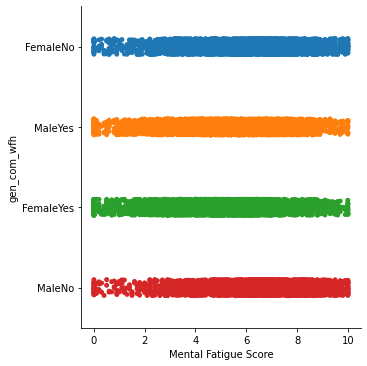

In [ ]:
sns.catplot(y='gen_com_wfh',x='Mental Fatigue Score',data=df)

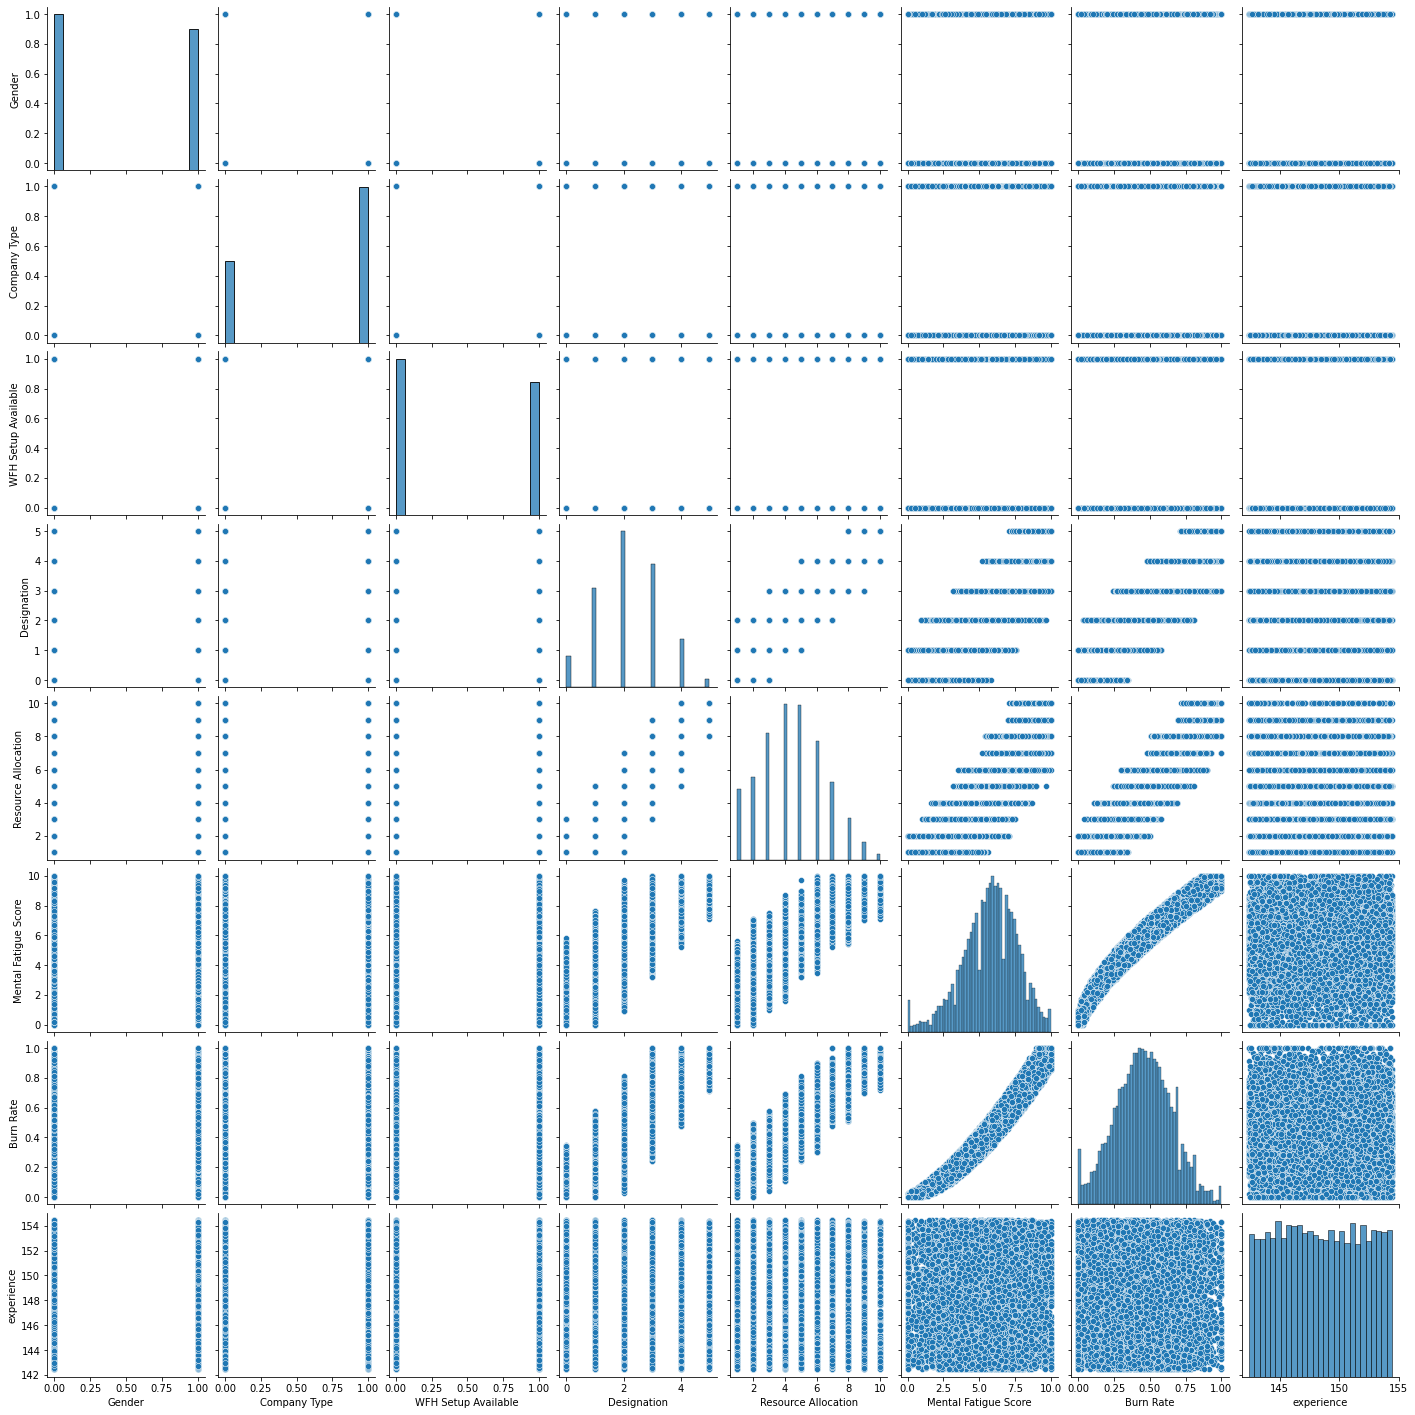

In [ ]:
sns.pairplot(df)

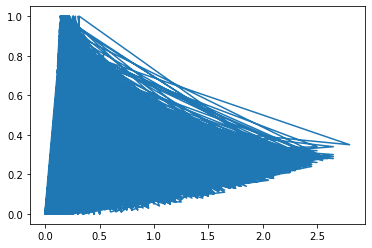

In [ ]:
plt.plot(df['Mental Fatigue Score']/((df['Resource Allocation']+1)*(df['Designation']+1)),df['Burn Rate'])

# Feature Preprocessing and Engineering

In [4]:
dtrain=dtrain.drop_duplicates(keep='first')#dropping duplicates
df=dtrain.copy()
dt=dtest.copy()
df=df[df['Burn Rate'].isnull()==False]#removing null values
df=df[df['Mental Fatigue Score'].isnull()==False]
df=df[df['Resource Allocation'].isnull()==False]

In [5]:
import datetime
df['Date of Joining']=pd.to_datetime(df['Date of Joining'])
dt['Date of Joining']=pd.to_datetime(dt['Date of Joining'])

#df['month']=df['Date of Joining'].dt.month
#df['day']=df['Date of Joining'].dt.day
#dt['month']=dt['Date of Joining'].dt.month
#dt['day']=dt['Date of Joining'].dt.day

d=datetime.datetime.now()
d=pd.to_datetime(d)
df['experience']=abs(d-df['Date of Joining'])
df['experience']=(df['experience']/np.timedelta64(1,'M'))
dt['experience']=abs(d-dt['Date of Joining'])
dt['experience']=(dt['experience']/np.timedelta64(1,'M'))
#df['experience_dec']=df['experience']%1
#dt['experience_dec']=dt['experience']%1
#df['Hours_worked']=df['experience']*df['Resource Allocation']
#dt['Hours_worked']=dt['experience']*dt['Resource Allocation']

In [ ]:
print(df['Company Type'].map(df['Company Type'].value_counts().to_dict()))

0        12174
1        12174
3        12174
4        12174
5         6416
         ...  
22743     6416
22744     6416
22746     6416
22748    12174
22749     6416
Name: Company Type, Length: 18590, dtype: int64


In [ ]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,month,day,experience,des_res,gen_mfs,des_mfs,des_counts,wfh_mfs,des_gen_mfs
0,fffe32003000360033003200,2008-09-30,0,1,1,2.0,3.0,3.8,0.16,9,30,13249.288783,4.187963,5.465538,5.672385,6214,6.309439,5.496676
1,fffe3700360033003500,2008-11-30,1,1,0,1.0,2.0,5.0,0.36,11,30,8710.859189,2.587759,6.026066,4.443171,3954,5.239511,4.517890
3,fffe32003400380032003900,2008-11-03,1,1,0,1.0,1.0,2.6,0.20,11,3,4382.429594,2.587759,6.026066,4.443171,3954,5.239511,4.517890
4,fffe31003900340031003600,2008-07-24,0,1,1,3.0,7.0,6.9,0.52,7,24,31391.007160,5.738618,5.465538,6.623577,4920,6.309439,6.400164
5,fffe3300350037003500,2008-11-26,1,0,0,2.0,4.0,3.6,0.29,11,26,17437.718377,4.187963,6.026066,5.672385,6214,5.239511,5.868688


In [6]:
df['Gender']=df['Gender'].map({"Male":1,"Female":0})
df['Company Type']=df['Company Type'].map({"Service":1,"Product":0})
df['WFH Setup Available']=df['WFH Setup Available'].map({"No":1,"Yes":0})
dt['Gender']=dt['Gender'].map({"Male":1,"Female":0})
dt['Company Type']=dt['Company Type'].map({"Service":1,"Product":0})
dt['WFH Setup Available']=dt['WFH Setup Available'].map({"No":1,"Yes":0})

In [7]:
df['Designation_res']=df['Designation'].astype('str')+df['Resource Allocation'].astype('str')
df['des_gen_com_mfs']=df.groupby(['Designation','Company Type','Gender'])['Mental Fatigue Score'].transform('mean')
df['des_gen_mfs']=df.groupby(['Designation','Gender'])['Mental Fatigue Score'].transform('mean')
df['gen_wfh_mfs']=df.groupby(['Gender','WFH Setup Available'])['Mental Fatigue Score'].transform('mean')
#df['des_res']=df.groupby('Designation')['Resource Allocation'].transform('mean')
#df['wfh_mfs']=df.groupby('WFH Setup Available')['Mental Fatigue Score'].transform('mean')
#df['res_mfs']=df.groupby('Resource Allocation')['Mental Fatigue Score'].transform('mean')
#df['hours_worked']=((d-df['Date of Joining'])/np.timedelta64(1,'D'))*df['Resource Allocation']
df['Mfs/des']=df['Mental Fatigue Score']/(df['Designation']+1)
df['Mfs/res']=df['Mental Fatigue Score']/(df['Resource Allocation']+1)

dt['Designation_res']=dt['Designation'].astype('str')+dt['Resource Allocation'].astype('str')
dt['des_gen_com_mfs']=dt.groupby(['Designation','Company Type','Gender'])['Mental Fatigue Score'].transform('mean')
dt['des_gen_mfs']=dt.groupby(['Designation','Gender'])['Mental Fatigue Score'].transform('mean')
dt['gen_wfh_mfs']=dt.groupby(['Gender','WFH Setup Available'])['Mental Fatigue Score'].transform('mean')
dt['Mfs/des']=dt['Mental Fatigue Score']/(dt['Designation']+1)
dt['Mfs/res']=dt['Mental Fatigue Score']/(dt['Resource Allocation']+1)
#dt['des_res']=dt.groupby('Designation')['Resource Allocation'].transform('mean')
#dt['hours_worked']=((d-dt['Date of Joining'])/np.timedelta64(1,'D'))*df['Resource Allocation']
#dt['wfh_mfs']=dt.groupby('WFH Setup Available')['Mental Fatigue Score'].transform('mean')
#dt['res_mfs']=dt.groupby('Resource Allocation')['Mental Fatigue Score'].transform('mean')


In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Designation_res']=l.fit_transform(df['Designation_res'])
dt['Designation_res']=l.transform(dt['Designation_res'])



In [9]:
df=df.drop(['Gender','Company Type'],axis=1)
dt=dt.drop(['Gender','Company Type'],axis=1)

In [ ]:
df.corr(method='pearson')['Burn Rate'].sort_values(ascending=False)

Burn Rate               1.000000
Mental Fatigue Score    0.944389
Resource Allocation     0.855005
Designation_res         0.780281
des_gen_mfs             0.740808
Designation             0.736412
gen_wfh_mfs             0.336071
WFH Setup Available     0.307168
Mfs/des                 0.147838
Mfs/res                 0.038748
experience             -0.000309
Name: Burn Rate, dtype: float64

# Baseline Model

In [10]:
y=df['Burn Rate']
X=df.drop(columns=['Employee ID','Date of Joining','Burn Rate'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model=RandomForestRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)
r2_score(y_test,pred)

0.9157161021489543

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor(max_depth=5,min_child_weight=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
r2_score(y_test,pred)

[08:53:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9271595519457708

In [ ]:
DT=dt.drop(['Employee ID','Date of Joining'],axis=1)
pred=model.predict(DT)
submission(pred,'xgb.csv')

In [ ]:
pd.DataFrame({"feature":list(X_train.columns),"score":model.feature_importances_})

,feature,score
0,WFH Setup Available,0.015811
1,Designation,0.007535
2,Resource Allocation,0.059793
3,Mental Fatigue Score,0.888643
4,experience,0.002023
5,Designation_res,0.015695
6,des_gen_mfs,0.002141
7,gen_wfh_mfs,0.008359


#Lightgbm

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
model=LGBMRegressor(cat_features=[0,1,2],max_depth=6)
model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=20)
pred=model.predict(X_test)
print("r2 score",r2_score(y_test,pred))
print("rmse",mean_squared_error(y_test,pred))

[1]	valid_0's l2: 0.0315206
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.0261463
[3]	valid_0's l2: 0.0218008
[4]	valid_0's l2: 0.0182546
[5]	valid_0's l2: 0.015375
[6]	valid_0's l2: 0.0130329
[7]	valid_0's l2: 0.0111583
[8]	valid_0's l2: 0.00961806
[9]	valid_0's l2: 0.00835287
[10]	valid_0's l2: 0.00733353
[11]	valid_0's l2: 0.00649882
[12]	valid_0's l2: 0.00582504
[13]	valid_0's l2: 0.00526785
[14]	valid_0's l2: 0.00482024
[15]	valid_0's l2: 0.00445174
[16]	valid_0's l2: 0.00415003
[17]	valid_0's l2: 0.00390708
[18]	valid_0's l2: 0.00370909
[19]	valid_0's l2: 0.00354706
[20]	valid_0's l2: 0.0034178
[21]	valid_0's l2: 0.00331145
[22]	valid_0's l2: 0.00322659
[23]	valid_0's l2: 0.00315492
[24]	valid_0's l2: 0.00309551
[25]	valid_0's l2: 0.00304388
[26]	valid_0's l2: 0.00300498
[27]	valid_0's l2: 0.00297282
[28]	valid_0's l2: 0.0029477
[29]	valid_0's l2: 0.0029244
[30]	valid_0's l2: 0.00290465
[31]	valid_0's l2: 0.00289007
[32]	valid_0's l2: 0.0028796

In [ ]:
DTl=dt.drop(['Date of Joining','Employee ID','des_gen_mfs'],axis=1)
Xl=X.drop(['des_gen_mfs'],axis=1)
#pred=model.predict(DT)


In [ ]:
X.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'experience',
       'Designation_res', 'des_res', 'wfh_mfs', 'gen_des', 'gen_wfh',
       'des_counts', 'res_counts', 'com_counts'],
      dtype='object')

In [ ]:
Xl.head()

,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,experience,Designation_res,des_gen_com_mfs,gen_wfh_mfs,Mfs/des,Mfs/res
0,1,2.0,3.0,3.8,145.666138,10,5.496474,6.010080,1.266667,0.950000
1,0,1.0,2.0,5.0,143.661990,4,4.504957,5.463544,2.500000,1.666667
3,0,1.0,1.0,2.6,144.549072,3,4.504957,5.463544,1.300000,1.300000
4,1,3.0,7.0,6.9,147.900270,19,6.415438,6.010080,1.725000,0.862500
5,0,2.0,4.0,3.6,143.793409,11,5.874352,5.463544,1.200000,0.720000


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
from lightgbm import LGBMRegressor
kf=KFold(n_splits=10,shuffle=True,random_state=120)
kf.get_n_splits(Xl)
predList=[]
r2=[]
rmse=[]
for train_index, test_index in kf.split(Xl):
  X_train, X_test = Xl.iloc[train_index], Xl.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  print(train_index,test_index)
  model=LGBMRegressor(cat_features=[0,1,2,4])
  model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=20)
  r2.append(r2_score(y_test,model.predict(X_test)))
  rmse.append(mean_squared_error(y_test,model.predict(X_test)))
  predList.append(model.predict(DTl))
print("avg r2_score",np.mean(r2))
print("avg rmse",np.sqrt(np.mean(rmse)))


[    0     3     4 ... 18587 18588 18589] [    1     2    13 ... 18540 18545 18585]
[1]	valid_0's l2: 0.0315206
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.0261463
[3]	valid_0's l2: 0.0217981
[4]	valid_0's l2: 0.018249
[5]	valid_0's l2: 0.0153624
[6]	valid_0's l2: 0.0130238
[7]	valid_0's l2: 0.0111466
[8]	valid_0's l2: 0.00961535
[9]	valid_0's l2: 0.00835023
[10]	valid_0's l2: 0.00733533
[11]	valid_0's l2: 0.00649658
[12]	valid_0's l2: 0.00582512
[13]	valid_0's l2: 0.00527512
[14]	valid_0's l2: 0.00482901
[15]	valid_0's l2: 0.00446074
[16]	valid_0's l2: 0.00416472
[17]	valid_0's l2: 0.00391787
[18]	valid_0's l2: 0.0037197
[19]	valid_0's l2: 0.00355689
[20]	valid_0's l2: 0.00342739
[21]	valid_0's l2: 0.00331835
[22]	valid_0's l2: 0.00323083
[23]	valid_0's l2: 0.0031587
[24]	valid_0's l2: 0.00309933
[25]	valid_0's l2: 0.00305168
[26]	valid_0's l2: 0.00301115
[27]	valid_0's l2: 0.00298018
[28]	valid_0's l2: 0.00295474
[29]	valid_0's l2: 0.0029343
[30]

In [ ]:
predList

[array([0.605025  , 0.35502163, 0.4186605 , ..., 0.83533519, 0.5742042 ,
        0.12309364]),
 array([0.60860531, 0.35962468, 0.43272508, ..., 0.82717516, 0.57662011,
        0.13311558]),
 array([0.60891002, 0.34750033, 0.41494194, ..., 0.82630369, 0.57797532,
        0.13044371]),
 array([0.60497145, 0.35810913, 0.4214688 , ..., 0.8317189 , 0.58326087,
        0.12756881]),
 array([0.60297433, 0.3539157 , 0.42628469, ..., 0.83421469, 0.58418657,
        0.13233746])]

In [ ]:
len(predList[0])

12250

In [ ]:
pred=predList[0]
for i in range(1,len(predList)):
  for j in range(len(predList[i])):
    pred[j]+=predList[i][j];
pred/=10
pred

array([0.60853528, 0.35644226, 0.42285276, ..., 0.83139896, 0.57643849,
       0.12610941])

In [ ]:
submission(pred,'lgb_cv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
?cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X, y, cv=5)
scores.mean()

0.9281453711700076

In [ ]:
pd.DataFrame({"feature":list(X_train.columns),"score":model.feature_importances_}).sort_values(by='score',ascending=False)

,feature,score
4,experience,648
3,Mental Fatigue Score,529
9,Mfs/res,485
8,Mfs/des,428
2,Resource Allocation,264
6,des_gen_com_mfs,205
5,Designation_res,199
7,gen_wfh_mfs,99
0,WFH Setup Available,51
1,Designation,32


#catboost

In [11]:
X=X.drop('des_gen_com_mfs',axis=1)
DT=dt.drop(['Date of Joining','Employee ID','des_gen_com_mfs'],axis=1)
X['Resource Allocation']=X['Resource Allocation'].astype('str')
X['Designation']=X['Designation'].astype('str')
DT['Resource Allocation']=DT['Resource Allocation'].astype('str')
DT['Designation']=DT['Designation'].astype('str')


In [12]:
u=X['experience']
v=DT['experience']
X=X.drop('experience',axis=1)
DT=DT.drop('experience',axis=1)

In [13]:
X.columns

Index(['WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Designation_res', 'des_gen_mfs', 'gen_wfh_mfs',
       'Mfs/des', 'Mfs/res'],
      dtype='object')

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
kf=KFold(n_splits=10,shuffle=True,random_state=120)
kf.get_n_splits(X)
predList=[]
r2=[]
rmse=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  print(train_index,test_index)
  model=CatBoostRegressor(cat_features=[0,1,2,4],early_stopping_rounds=30,l2_leaf_reg=0.8,depth=8,per_float_feature_quantization='3:border_count=1024',border_count=240)
  model.fit(X_train,y_train,eval_set=[(X_test,y_test)])
  r2.append(r2_score(y_test,model.predict(X_test)))
  rmse.append(mean_squared_error(y_test,model.predict(X_test)))
  predList.append(model.predict(DT))
print("avg r2_score",np.mean(r2))
print("avg rmse",np.sqrt(np.mean(rmse)))

Streaming output truncated to the last 5000 lines.
bestIteration = 478

Shrink model to first 479 iterations.
[    0     1     2 ... 18587 18588 18589] [   36    40    49 ... 18565 18570 18572]
0:	learn: 0.1929820	test: 0.1909014	best: 0.1909014 (0)	total: 33.9ms	remaining: 33.9s
1:	learn: 0.1881143	test: 0.1860835	best: 0.1860835 (1)	total: 67.2ms	remaining: 33.5s
2:	learn: 0.1832709	test: 0.1812879	best: 0.1812879 (2)	total: 88ms	remaining: 29.3s
3:	learn: 0.1786145	test: 0.1766873	best: 0.1766873 (3)	total: 111ms	remaining: 27.5s
4:	learn: 0.1741485	test: 0.1722284	best: 0.1722284 (4)	total: 133ms	remaining: 26.4s
5:	learn: 0.1697358	test: 0.1678572	best: 0.1678572 (5)	total: 153ms	remaining: 25.3s
6:	learn: 0.1654749	test: 0.1636107	best: 0.1636107 (6)	total: 179ms	remaining: 25.4s
7:	learn: 0.1614086	test: 0.1595267	best: 0.1595267 (7)	total: 197ms	remaining: 24.4s
8:	learn: 0.1574983	test: 0.1556662	best: 0.1556662 (8)	total: 214ms	remaining: 23.6s
9:	learn: 0.1537119	test: 0.151

In [ ]:
pred=predList[0]
for i in range(1,len(predList)):
  for j in range(len(predList[i])):
    pred[j]+=predList[i][j];
pred/=10
pred

array([0.61689751, 0.35615561, 0.42424651, ..., 0.82934584, 0.57420207,
       0.12300385])

In [ ]:
submission(pred,'cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame({"feature":list(X_train.columns),"score":model.feature_importances_}).sort_values(by='score',ascending=False)

,feature,score
3,Mental Fatigue Score,68.446596
10,res_counts,11.418502
8,Mfs/res,6.061188
7,Mfs/des,3.563217
2,Resource Allocation,3.359040
5,des_gen_mfs,1.629290
9,des_counts,1.624057
6,gen_wfh_mfs,1.322932
1,Designation,0.840487
0,WFH Setup Available,0.735973


In [ ]:
cross_val_score(model,X,y,cv=5).mean()

In [ ]:
df.shape,dt.shape

((18590, 20), (12250, 19))

In [ ]:
def submission(pred,name):
  s=pd.DataFrame({
      "Employee ID":dtest['Employee ID'],
      "Burn Rate":pred
  })
  s.to_csv(name)
  from google.colab import files
  files.download(name)

In [ ]:
f1=pd.read_csv('cat.csv')
f2=pd.read_csv('lgb_cv.csv')
#f3=pd.read_csv('xgb.csv')
f=f1.copy()
f['Burn Rate']=(2*f1['Burn Rate']+f2['Burn Rate'])/3
f.head()
submission(f['Burn Rate'],'ens.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We will use this ens.csv for submission.

In [ ]:
f

,Unnamed: 0,Employee ID,Burn Rate
0,0,fffe31003300390039003000,0.612046
1,1,fffe31003300310037003800,0.356599
2,2,fffe33003400380035003900,0.422717
3,3,fffe3100370039003200,0.375811
4,4,fffe32003600390036003700,0.535007
...,...,...,...
12245,12245,fffe3900310034003700,0.420681
12246,12246,fffe32003600330034003000,0.432092
12247,12247,fffe31003800340039003000,0.833548
12248,12248,fffe32003600380031003800,0.572587
